#**군집화**

#**1.K-평균 알고리즘 이해**

##**1-1. 와인 데이터 세트 불러오기**

In [ ]:
# 필요한 라이브러리 임포트
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
# 와인 데이터셋 로드
wine = load_wine()

# DataFrame 변환
wineDF = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# 변환된 데이터프레임 확인
wineDF.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


##**1-2.데이터 스케일링 및 K-means 모델 생성하고 학습하기**

모델의 파라미터
- 3개의 그룹으로 군집화되며
- 초기 중심 설정 방식은 디폴트 값으로
- 최대 반복 횟수 또한 디폴트 값 300으로 되도록 설정하기

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wineDF)

# K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
kmeans.fit(wine_scaled)
# KMeans의 label_ 속성값 확인해보기
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


##**1-3. 실제 와인 품질 분류와 얼마나 차이가 나는지 군집화가 효과적으로 되었는지 확인해보기(GroupBy 연산 활용)**

- 와인 데이터셋 분류값 target을 'target' 칼럼으로 추가하기
- K-means 모델의 군집화 분류값 labels_을 'cluster' 칼럼으로 추가하기

In [ ]:
# 실제 레이블(target)과 클러스터 결과(cluster) 비교
# 실제 레이블 추가
wineDF['target'] = wine.target
# K-Means 클러스터 결과 추가
wineDF['cluster'] = kmeans.labels_

# GroupBy 연산을 통해 비교
wine_result = wineDF.groupby(['target', 'cluster'])[wine.feature_names[0]].count()
print(wine_result)

target  cluster
0       2          59
1       0          65
        1           3
        2           3
2       1          48
Name: alcohol, dtype: int64


##**1-4. 차원 축소 실행하기**

- 2개의 차원으로 축소할 수 있도록 PCA의 컴포넌트 값 집어넣기

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA를 이용한 차원 축소 (2개 차원)
pca = PCA(n_components=2)
# 스케일링 진행하기
pca_transformed = pca.fit_transform(wine_scaled)
wineDF['pca_x'] = pca_transformed[:, 0]
wineDF['pca_y'] = pca_transformed[:, 1]

# PCA 변환 결과 확인
wineDF.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2,3.316751,1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2,2.209465,-0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2,2.516740,1.031151


##**1-5. 군집 결과 시각화**

- pca_x가 x좌표 값을 나타내도록
- pca_y가 y좌표 값을 나타내도록
- 군집 값 0의 마커는 'o', 군집 값 1의 마커는 's', 군집 값 2의 마커는 '^'

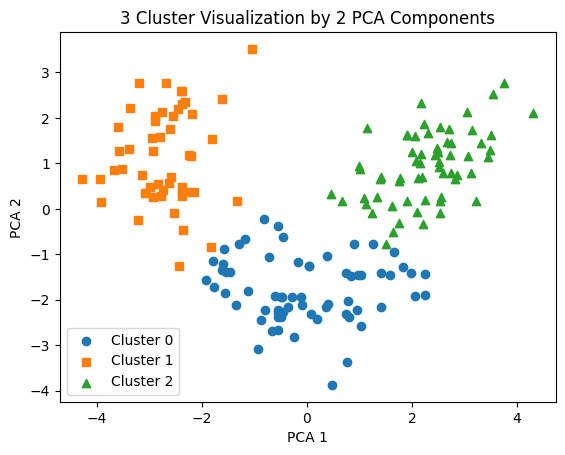

In [ ]:
# 군집 결과 시각화
# 군집 값이 0, 1, 2인 경우 각각의 인덱스 추출
marker0_ind = wineDF[wineDF['cluster'] == 0].index
marker1_ind = wineDF[wineDF['cluster'] == 1].index
marker2_ind = wineDF[wineDF['cluster'] == 2].index

# 군집 값 0, 1, 2에 해당하는 데이터를 각각 다른 마커로 표시
plt.scatter(x=wineDF.loc[marker0_ind, 'pca_x'], y=wineDF.loc[marker0_ind, 'pca_y'], marker='o', label='Cluster 0')
plt.scatter(x=wineDF.loc[marker1_ind, 'pca_x'], y=wineDF.loc[marker1_ind, 'pca_y'], marker='s', label='Cluster 1')
plt.scatter(x=wineDF.loc[marker2_ind, 'pca_x'], y=wineDF.loc[marker2_ind, 'pca_y'], marker='^', label='Cluster 2')

# 시각화 설정
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.legend()
plt.show()

#**2. 군집 평가**

##**2-1. 실루엣 계수와 평균 실루엣 계수 계산하기**

- 실루엣 계수 메서드 : 스케일링된 wine_scaled와 군집 레이블값 wineDF['cluster']을 인자로
- 평균 실루엣 계수 메서드 : 스케일링된 wine_scaled와 군집 레이블값 wineDF['cluster']을 인자로

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
# 실루엣 계수 계산
score_samples = silhouette_samples(wine_scaled, wineDF['cluster'])
wineDF['silhouette_coeff'] = score_samples

# 평균 실루엣 계수 계산
average_score = silhouette_score(wine_scaled, wineDF['cluster'])
print(f'와인 데이터 세트 Silhouette Analysis Score: {average_score:.3f}')

# 클러스터별 평균 실루엣 계수 확인
wineDF.groupby('cluster')['silhouette_coeff'].mean()

와인 데이터 세트 Silhouette Analysis Score: 0.285


,silhouette_coeff
cluster,
0,0.177409
1,0.350622
2,0.343413


* 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 > 실행시키기

In [ ]:
def visualize_silhouette(cluster_lists, X_features):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

##**2-2. make_blobs() 함수로 데이터셋을 생성하고, 군집 개수에 따른 군집 실루엣 계수 평균값 시각화하기**

파라미터 값 설정
- 생성할 총 데이터의 개수 : 500개
- 데이터 피처 개수 : 2개
- 군집의 개수 : 4개
- 생성도리 군집 데이터의 표준편차 : 1

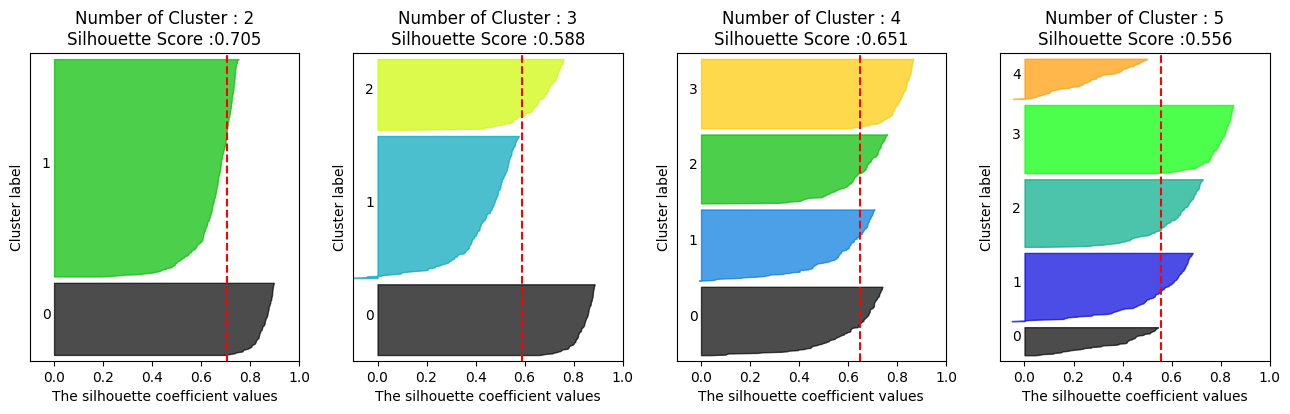

In [ ]:
#make_blobs()를 통해 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0,
                center_box=(-10.0,10.0), shuffle=True, random_state=1)
#군집 개수가 2개, 3개, 4개, 5개일 때 군집 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

##**2-3. 여기서 왜 데이터 피처의 개수를 2개로 하였는가? 마크다운을 해제하고 정답을 입력하시오**

정답 :일반적으로 군집화 결과를 시각화하기 위함,(2차원 데이터는 시각적으로 쉽게 표현할 수 있기 때문)

#**3. 평균이동(Mean Shift)**

#**3-1. 다음 조건을 만족하도록 빈칸을 채우시오**
- 데이터 생성
  - make_bolbs()를 사용
  - 데이터 생성 시 parameter 설정
    - n_samples=300
    - n_features=2
    - centers=3
    - cluster_std=0.7
    - random_state=0
  - 대역폭은 1로 설정

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift()
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


#**3-2. 최적의 bandwidth를 찾는 함수를 이용해 최적화된 bandwidth값을 적용하시오**

In [16]:
from sklearn.cluster import MeanShift
import pandas as pd
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=300)
print('bandwidth 값:', round(best_bandwidth,3))

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

bandwidth 값: 1.289
cluster labels 유형: [0 1 2 3]



##**3-3. '3-2'에서 군집화된 결과를 시각화하시오**

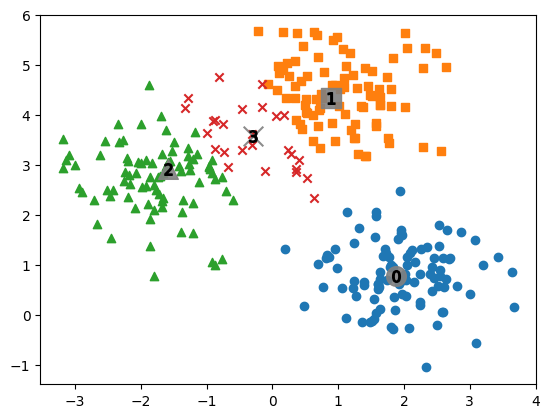

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers= meanshift.cluster_centers_
unique_labels= np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  #군집별로 다른 마커로 산점도 적용
  plt.scatter(label_cluster['ftr1'], label_cluster['ftr2'], marker=markers[label], label=f'Cluster {label}')

  #군집별 중심 표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$'%label)

plt.show()

#**4. GMM(Gaussian Mixture Model)**

##**4-1. 다음 문장의 빈칸을 채우시오**


###**4-1-1. GMM은 군집 화를 적용하고자 하는 데이터가 여러개의 *##빈간##*를 가진 데이터 집합이 섞여서 생성된 것이라는 가정하에 군집화를 수행한다.**

답:가우시안 분포

###**4-1-2. GMM의 *##빈칸##*은 개별 정규 분포의 평균과 분산을 추정하고 각 데이터가 어떤 정규 분포에 해당되는지의 확률을 추정한다.**

답: 파라미터

##**4-1-3. *##빈칸##*은 데이터 세트가 원형의 범위를 가질 수록 유리하고, *##빈칸##*은 데이터가 분포된 방향에 따라 정확하게 군집화할 수 있다.**

답:K-means / GMM

##**4-2. n_components=3으로 하는 GMM 군집화를 실행하시오**

In [18]:
#답 작성x 바로 실행
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

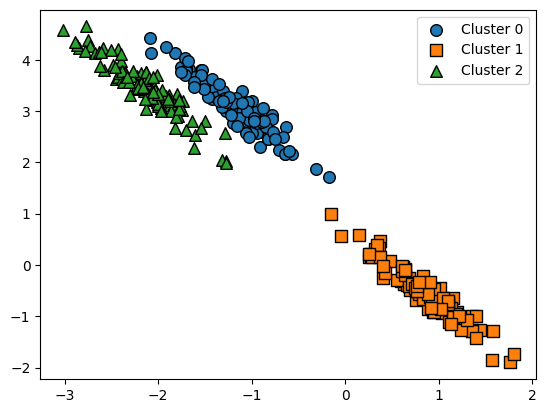

In [19]:
#답 작성x 바로 실행
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#make_bolbs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y=make_blobs(n_samples=300,n_features=2,centers=3, cluster_std=0.5,random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation =[[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
#feature 데이터 세트와 make_bolbs()의 y결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

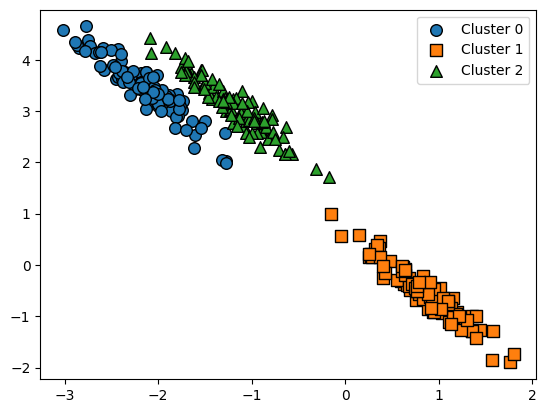

In [20]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

#**5. DBSCAN**

##**5-1. DBSCAN의 중요 parameter 두개는 무엇인가?**



답:eps, min_samples


##**5-2. DBSCAN에서 데이터 포인트 종류 네개는 무엇인가?**

답:core point, border point, noise point, outlier point

##**5-3. DBSCAN을 수행하는 코드를 완성하시오(eps=0.2, min_samples=8)**

In [21]:
#답 작성x 바로 실행
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

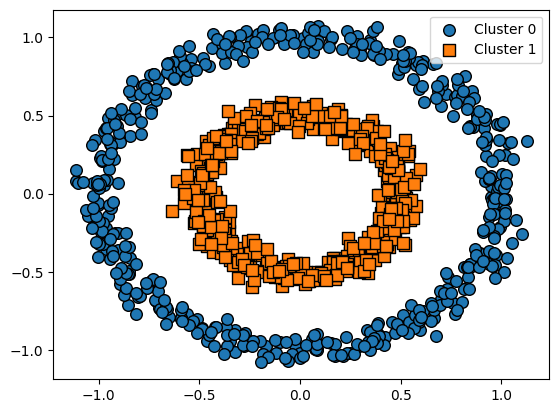

In [22]:
#답 작성x 바로 실행
from sklearn.datasets import make_circles

X,y=make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

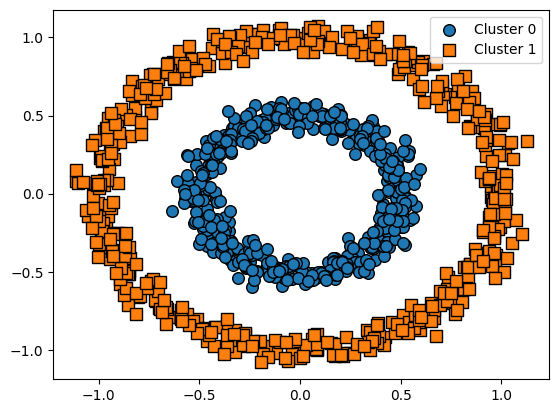

In [23]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=8,metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

#**6. 군집화 실습 - 고객 세그먼테이션**

#**RFM 기법에 따라 고객 세그먼테이션을 수행할 것입니다. 아래의 빈칸을 채우세요.**
- 데이터 셋 다운로드 링크 : https://archive.ics.uci.edu/dataset/352/online+retail

In [27]:
# 파일 경로 지정 후, 아래 코드를 실행해주세요.
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel('/content/Online Retail.xlsx')

##**6-1. 현재는 CustomerID에 Null데이터가 많습니다. 불린 인덱싱을 적용하여 필터링해주세요.**

In [29]:
# 빈칸을 완성해주세요.
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
retail_df = retail_df[retail_df['Country']=='United Kingdom']


##**6-2. DataFrame에 groupby를 호출해 반환된 DataFrameGroupby 객체에 agg()를 이용하려 합니다. 다음 빈칸을 채워주세요.**
- Recency는 InvoiceDate 칼럼의 max()에서 데이터 가공
- Frequency는 InvoiceNO 칼럼의 count()에서 데이터 가공
- Monetary는 sale_amount 칼럼의 sum()에서 데이터 가공



In [30]:
# 빈칸을 완성해주세요.

retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}

cust_df = retail_df.groupby('CustomerID').agg(aggregations)
cust_df = cust_df.rename(columns = {'InvoiceDate': 'Recency',
                                    'InvoiceNo': 'Frequency',
                                    'sale_amount': 'Monetary'
                                    }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


##**6-3. Recency 칼럼은 데이터 값의 특성으로 인해 데이터 가공이 추가로 필요합니다. 빈칸을 완성해주세요.**
- 온라인 판매 데이터는 2010년 12월 1일에서 2011년 12월 9일까지의 데이터 입니다.
- 오늘 날짜는 2011년 12월 10일로 가정합니다.

In [33]:
# 빈칸을 완성해주세요.
import datetime as dt

# 오늘 날짜 설정
today_date = dt.datetime(2011, 12, 10)

cust_df['Recency'] = today_date- cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days)
print('cust_df 로우와 칼럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12747,2,103,4196.01
2,12748,0,4595,33719.73


#**7. 추가 개념**
발표자료를 기반으로 다음 문제를 푸시면 됩니다.

##**7-1. '이것'은 각각의 데이터 포인트를 하나의 클러스터로 지정하고, 지정된 개수의 클러스터가 남을 때까지 가장 비슷한 두 클러스터로 합쳐 나가는 알고리즘입니다. '이것'은 무엇인가요?**

계층적 군집화

##**7-2. '7-1번에서의 알고리즘'의 3가지 이상 linkage옵션을 각각 간단히 서술하세요.**


1. 최단 연결법: 두 클러스터 간의 거리 계산 시, 두 클러스터에서 가장 가까운 두 포인트 사이의 거리를 사용
2. 최대 연결법: 두 클러스터 간의 거리 계산 시, 두 클러스터에서 가장 멀리 떨어진 두 포인트 사이의 거리를 사용
3. 평균 연결법: 두 클러스터 간의 거리 계산 시, 두 클러스터 내 모든 포인트 간의 평균 거리를 사용

